In [1]:
! .././ns3 run single-bottleneck-link.cc  -- --transportProtocol=ns3::TcpLinuxReno --flowStatFile=results/flow/LinuxReno_flow_stats.csv

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import random

In [3]:
RESULTS_DIR = '../results/flow/LinuxReno_flow_stats.csv'

In [4]:
data = pd.read_csv(RESULTS_DIR)
data

,Flow ID,Time,Throughput,Packets Dropped,Fairness,Window Size
0,0,0.101,4.35903,0,0.530580,1
1,1,0.101,4.34159,0,0.530580,1
2,2,0.101,4.33208,0,0.530580,1
3,3,0.101,4.32615,0,0.530580,1
4,0,0.201,3.66587,1,0.552064,318
...,...,...,...,...,...,...
2391,3,59.801,2.97252,210,0.546695,49
2392,0,59.901,2.97268,210,0.546690,58
2393,1,59.901,2.97265,210,0.546690,58
2394,2,59.901,2.97261,210,0.546690,58


In [5]:
def generate_subplot(ax: list[plt.Axes], flow_id: int, time: list[object], data: list[object], color: str, label: str, offset: int, loglog: bool):
    ax.append(ax[0].twinx())
    ax[-1].plot(time, data, label=f'Flow ID: {flow_id}', color=color)
    ax[-1].set_ylabel(label, color=color)
    ax[-1].tick_params('y', colors=color)
    ax[-1].spines['right'].set_position(('outward', offset))
    if loglog:
        ax[-1].set_yscale('log')
        ax[-1].set_xscale('log')

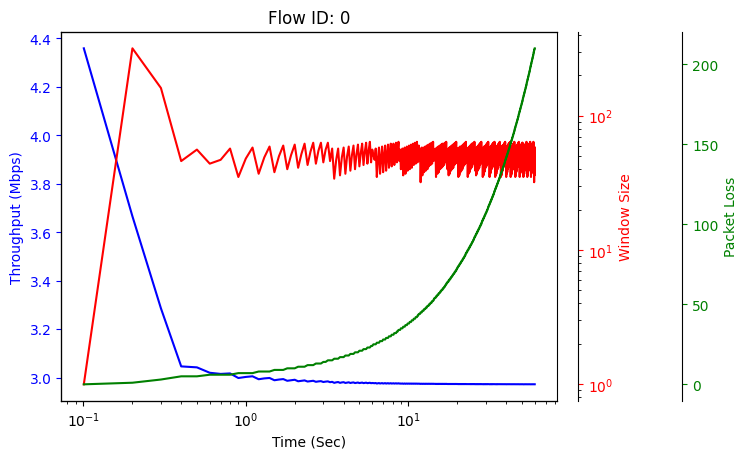

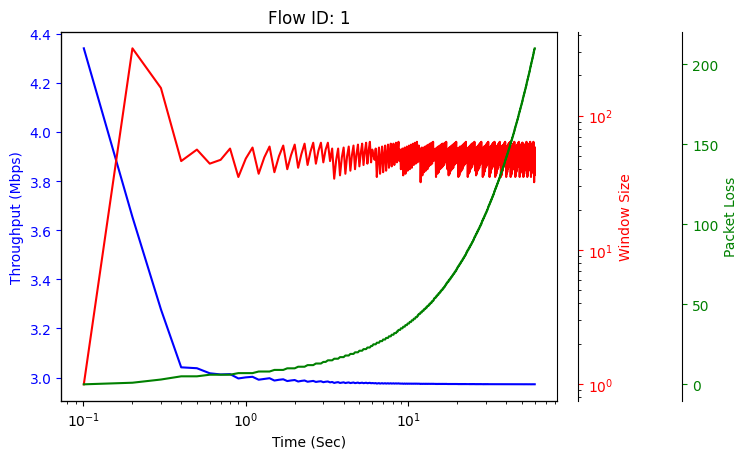

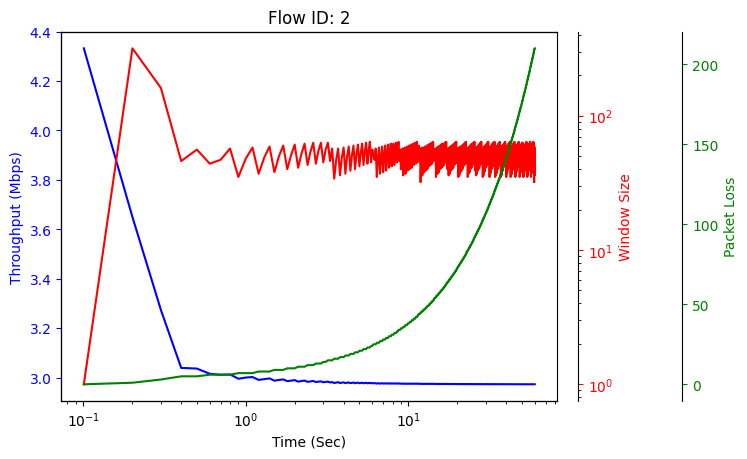

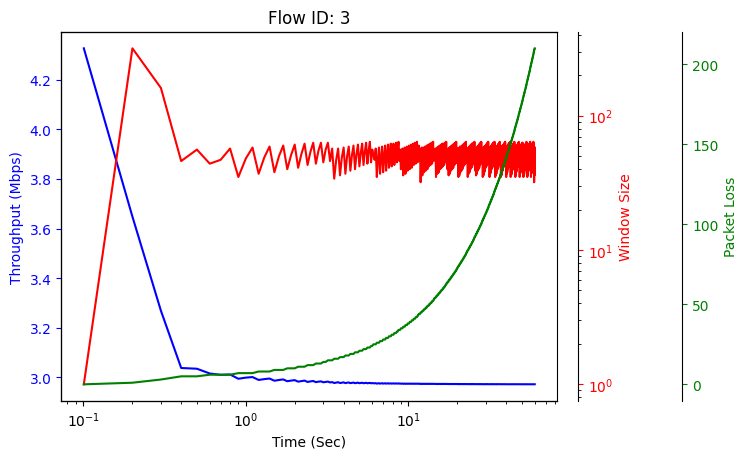

In [8]:
flow_ids = data['Flow ID'].unique()

for flow_id in flow_ids:
    flow_data = data[data['Flow ID'] == flow_id]

    time = flow_data['Time']
    throughput = flow_data['Throughput']
    window_size = flow_data['Window Size']
    packet_loss = flow_data['Packets Dropped']
    fairness = flow_data['Fairness']

    fig, ax1 = plt.subplots()
    ax1.title.set_text(f'Flow ID: {flow_id}')
    ax = [ax1]

    color = 'blue'
    ax[-1].plot(time, throughput, label=f'Flow ID: {flow_id}', color=color)
    ax[-1].set_xlabel('Time (Sec)')
    ax[-1].set_ylabel('Throughput (Mbps)', color=color)
    ax[-1].tick_params('y', colors=color)

    generate_subplot(ax, flow_id, time, window_size, 'red', 'Window Size', 15, True)
    generate_subplot(ax, flow_id, time, packet_loss, 'green', 'Packet Loss', 90, False)
    # generate_subplot(ax, flow_id, time, fairness, 'orange', 'Fairness', 90, True)
    
    # Display the plot
    plt.show()
    plt.close()